In [2]:
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

In [3]:
df1 = pd.read_csv('day.csv')

In [4]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Lets check for any kind of null or missing values**

In [8]:
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**NO there are no null values**

**Explotaory data Analysis and will change the column type according to their behaviour**

In [9]:

df1['season']= df1['season'].astype('category')
df1['yr']=df1['yr'].astype('int')
df1['mnth']=df1['mnth'].astype('category')
df1['holiday']=df1['holiday'].astype('int')
df1['workingday']=df1['workingday'].astype('int')
df1['weekday']=df1['weekday'].astype('category')
df1['weathersit']=df1['weathersit'].astype('category')
d1=df1['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=dt.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')
df1['dteday']=d1
df1['dteday']=df1['dteday'].astype('category')
df1 = df1.drop(['instant','casual', 'registered'], axis=1)

**Already we have count column so casual and registered not make sense** 

In [10]:
df1.groupby(['weekday'])['cnt'].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [11]:
df1.dtypes

dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

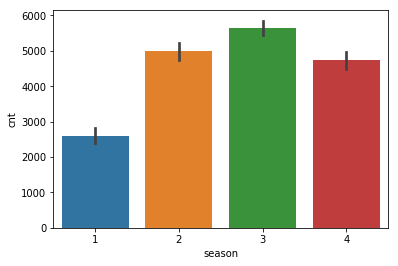

In [12]:
#x=df1.groupby(['season'])['cnt'].sum()

sns.barplot(x=df1['season'],y=df1['cnt'])

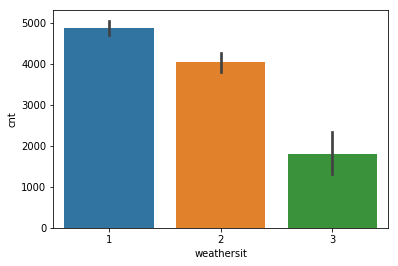

In [15]:
sns.barplot(x=df1['weathersit'],y=df1['cnt'])

**Grouping By month data to know the counts**

In [243]:
df1.groupby(['mnth'])['cnt'].sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

**More no. of renters are in April to Novermber . Considering 25K as reference.**

In [244]:
df2011 = df1[df1['yr']==0]
df2012 = df1[df1['yr']==1]
#df1.groupby(['mnth'])['cnt'].sum()

In [245]:
df2011.groupby(['mnth'])['cnt'].sum()

mnth
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: cnt, dtype: int64

In [246]:
df2012.groupby(['mnth'])['cnt'].sum()


mnth
1      96744
2     103137
3     164875
4     174224
5     195865
6     202830
7     203607
8     214503
9     218573
10    198841
11    152664
12    123713
Name: cnt, dtype: int64

**We can see in the renters are more in case year 2012 and april to november the renting count goes higjh and then again it comes down.**

**Approx mean in the year 2012**

In [247]:
df2012.groupby(['mnth'])['cnt'].mean()

mnth
1     3120.774194
2     3556.448276
3     5318.548387
4     5807.466667
5     6318.225806
6     6761.000000
7     6567.967742
8     6919.451613
9     7285.766667
10    6414.225806
11    5088.800000
12    3990.741935
Name: cnt, dtype: float64

In [248]:
df2012.groupby(['mnth'])['cnt'].std()


mnth
1      872.852134
2      870.724640
3     1251.162682
4     1308.938916
5     1078.403997
6      954.204995
7      867.183736
8      794.059017
9      979.160925
10    1941.819400
11    1129.731198
12    1803.227864
Name: cnt, dtype: float64

In [249]:
df2011.groupby(['season'])['cnt'].sum()

season
1    150000
2    347316
3    419650
4    326137
Name: cnt, dtype: int64

In [250]:
df2012.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,1.000000,-0.258418,-0.039023,-0.039663,0.001403,0.011686,-0.118134
workingday,NaN,-0.258418,1.000000,0.059342,0.059028,0.013291,-0.048955,0.118884
temp,NaN,-0.039023,0.059342,1.000000,0.986165,0.118262,-0.203691,0.713793
atemp,NaN,-0.039663,0.059028,0.986165,1.000000,0.134662,-0.233086,0.720314
hum,NaN,0.001403,0.013291,0.118262,0.134662,1.000000,-0.291031,-0.088861
windspeed,NaN,0.011686,-0.048955,-0.203691,-0.233086,-0.291031,1.000000,-0.279008
cnt,NaN,-0.118134,0.118884,0.713793,0.720314,-0.088861,-0.279008,1.000000


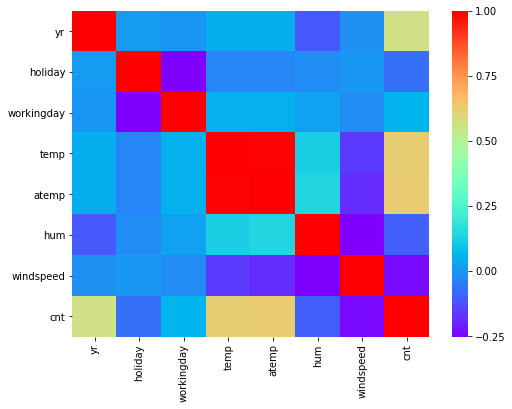

In [251]:
corr = df1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,mask = np.zeros_like(corr,dtype=np.bool),cmap='rainbow')

**Co-relation between the columns can be clearly seen in heatmap , where darkred is the strong co related columns like 
"temp,atemp with cnt" , "mnth , season with cnt"**

In [252]:
#df1[df1['mnth']==12]

**atemp and temp carries same info so dropping atemp column for further analysis**

In [254]:
import statsmodels.api as sm

In [255]:
df1.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


**Spliting data into training and testing set**

In [256]:
from sklearn.model_selection import train_test_split


df1_linr=df1.copy()
categorical = ["season", "dteday", "weathersit", "mnth","weekday"]
for i in categorical:
    temp_c = pd.get_dummies(df1_linr[i], prefix = i)
    df1_linr = df1_linr.join(temp_c)


In [257]:
drop = ['dteday', 'season', 'weathersit', 'weekday', 'mnth','cnt']
df1_linr = df1_linr.drop(drop, axis=1)
df1_linr=df1_linr.join(df1['cnt'])


In [294]:
X, y = train_test_split(df1_linr, test_size=0.2)
model = sm.OLS(X['cnt'], X.iloc[:,0:63]).fit()


In [295]:
predictions = model.predict(y.iloc[:,0:63])

In [278]:
results = sm.OLS(df1_linr['cnt'], df1_linr).fit()

In [279]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.701e+30
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:51:47   Log-Likelihood:                 17984.
No. Observations:                 731   AIC:                        -3.585e+04
Df Residuals:                     671   BIC:                        -3.557e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr            2.402e-12   6.65e-13      3.611   

**From above OLS model we can confirm that this is stronmg fit as Rsquared value is 1**

**Next apply Linear regression**

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
#from sklearn.


In [281]:
linr = LinearRegression()

**Now find the MAE(Root mean absolute  error in %)**

In [296]:
def MAPE(y_test,predictions):
    mape = np.mean(np.abs((y_test-predictions)/y_test))*100
    return mape


In [297]:
MAPE(y['cnt'],predictions)

21.39837956223615

**An error of 21 % can be observed which is ok**

**lets try random forest now once or decision tree**

In [302]:
########## Random Forest ################
df1_RF = df1.drop('atemp',axis=1)



In [340]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

train,test = train_test_split(df1_RF,test_size = 0.2)



In [346]:
RFmodel = RandomForestRegressor(n_estimators = 200).fit(df1_RF.iloc[:,0:11], df1_RF.iloc[:,11])
RF_Predictions = RFmodel.predict(test.iloc[:,0:11])

In [347]:
### Same MAPE function here 

MAPE(test['cnt'],RF_Predictions)

6.328395699324122

**With Random Forest the MAPE is less so prediction will be done with MAPE only**

In [343]:
result=pd.DataFrame(test.iloc[:,0:11])
result['pred_cnt'] = (RF_Predictions)

result.to_csv("Random_forest_res_bike_renting.csv",index=False)

In [350]:
result=pd.DataFrame(test.iloc[:,0:11])
result['pred_cnt'] = (predictions)

result.to_csv("Linear_Predictions_res_bike_renting.csv",index=False)

In [349]:
## THE END